In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=13)

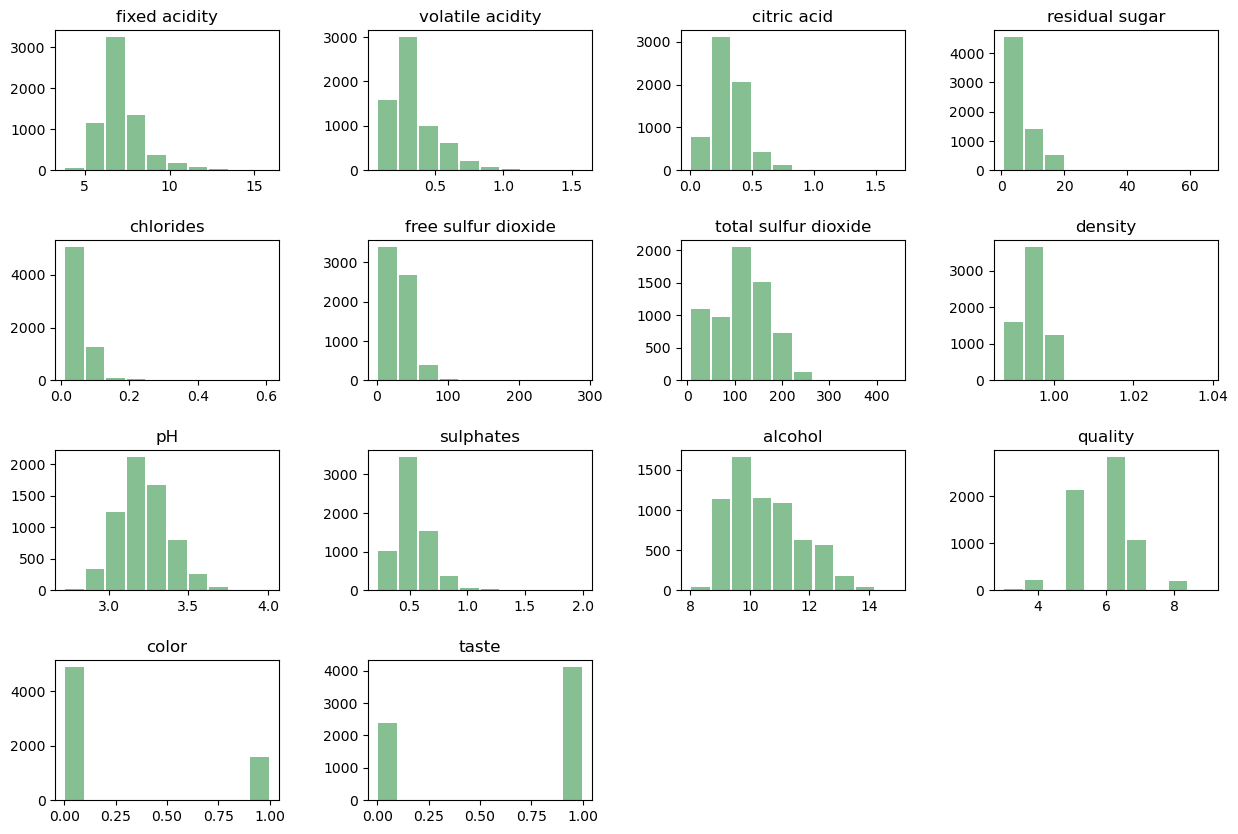

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

wine.hist(figsize=(15, 10), bins=10, grid=False, color='#86bf91', rwidth=0.9)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

In [19]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar', 'chlorides', 'free sulfur dioxide', 
                'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

df_pivot = pd.pivot_table(data=wine, index='quality', values=column_names, aggfunc='median')
df_pivot

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.15,0.0550,0.33,0.995900,7.45,17.0,3.245,3.15,0.505,102.5,0.415
4,10.00,0.0505,0.26,0.994995,7.00,15.0,3.220,2.20,0.485,102.0,0.380
5,9.60,0.0530,0.30,0.996100,7.10,27.0,3.190,3.00,0.500,127.0,0.330
6,10.50,0.0460,0.31,0.994700,6.90,29.0,3.210,3.10,0.510,117.0,0.270
7,11.40,0.0390,0.32,0.992400,6.90,30.0,3.220,2.80,0.520,114.0,0.270
8,12.00,0.0370,0.32,0.991890,6.80,34.0,3.230,4.10,0.480,118.0,0.280
9,12.50,0.0310,0.36,0.990300,7.10,28.0,3.280,2.20,0.460,119.0,0.270


In [23]:
wine_corr = wine.corr()
abs(wine_corr['quality']).sort_values(ascending=False)[2:]

alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
color                   0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

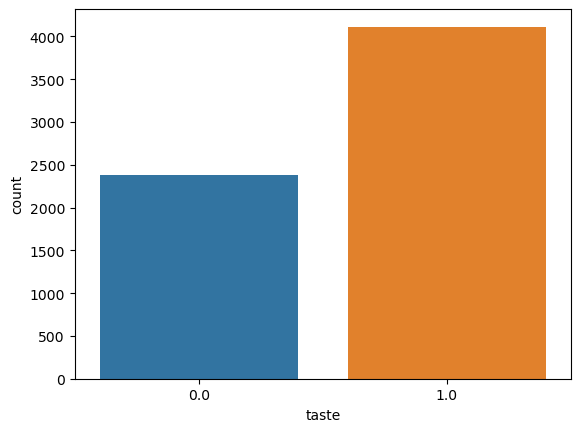

In [25]:
import seaborn as sns

sns.countplot(x='taste', data=wine);

In [26]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('GBM', GradientBoostingClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('AdaBoost BOOST', AdaBoostClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression()))

In [31]:
%%time

from sklearn.model_selection import KFold, cross_val_score

results = []
names = []
kfold = KFold(n_splits=5, random_state=13, shuffle=True)

for name, model in models:
    cv_results = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

GBM: 0.766 (0.021)
Random Forest: 0.821 (0.018)
AdaBoost BOOST: 0.753 (0.026)
Decision Tree: 0.753 (0.008)
Logistic Regression: 0.743 (0.016)
CPU times: total: 15.6 s
Wall time: 15.5 s


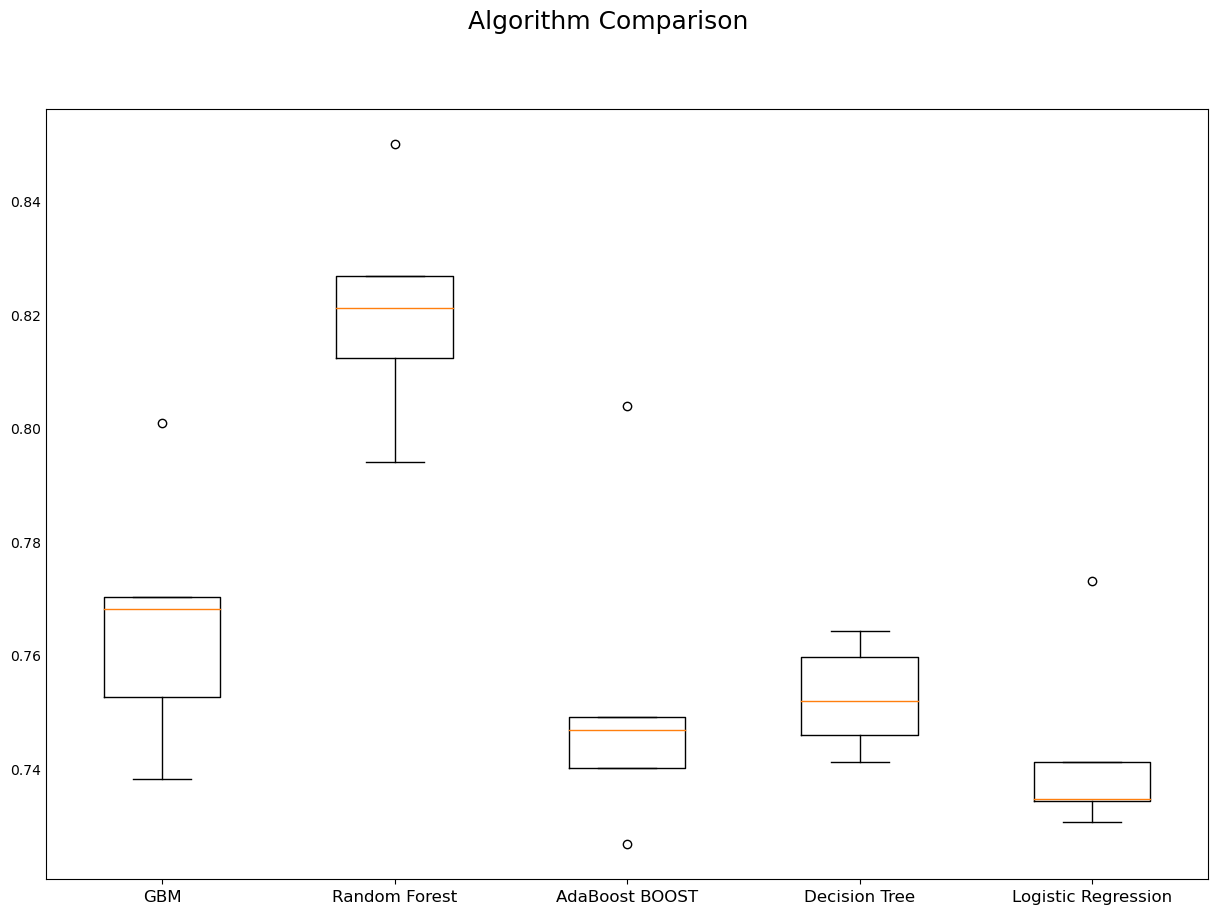

In [41]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison', fontsize=18)
ax = fig.add_subplot(111)

ax.boxplot(results)
ax.set_xticklabels(names, fontsize=12)
ax.tick_params(axis='y', which='both', length=0)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name}: {accuracy_score(y_test, y_pred):.3f}')

GBM: 0.788
Random Forest: 0.830
AdaBoost BOOST: 0.755
Decision Tree: 0.778
Logistic Regression: 0.747
